In [1]:
import ugradio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import matplotlib.pyplot as plt


savepathTest = "../Lab1Visualizations/Section5_2/"

def extractData(filePath, fileName):
    ''' Extracting captured data from the lab1 npz array from SDR'''
    raw_data = np.load(filePath + fileName)
    try:
        time_data, sample_rate = (np.concatenate(raw_data['time_data'][1:])), raw_data['sample_rate']  
        time_data = time_data - np.mean(time_data)
        return time_data, sample_rate
    except Exception as e: 
        return [raw_data['arr_0'][0], 'Placeholder for Sample Rate']

def amplitudePlotter(savePath, fileName, time_data):
    fileName = fileName.rstrip('.npz') 
    plt.plot(time_data)
    
    plt.xlabel("Samples")
    plt.ylabel("Amplitude (Energy)")
    
    plt.xlim(1870,2000)
    
    plt.title('Exploratory Amplitude vs. Sample')

   #plt.savefig(savePath+f"{fileName}AmplitudeVsSample.png", dpi=300)#, bbox_inches='tight')  

    plt.show()
    return

def fourierTransformPlotter(savePath, fileName, time_data,freq_data):
    if type(freq_data) != str:
        
        fileName = fileName.rstrip('.npz') 

        fft_values = np.fft.fft(time_data)

        fft_freqs = np.fft.fftfreq(len(time_data),1/freq_data)

        plt.plot(fft_freqs/(1e3),fft_values)

        plt.xlabel("Frequency (kHz)")
        plt.ylabel("Voltage (Arbitrary Units)")

        plt.title('Exploratory Voltage Amplitude vs. Sample')

        #plt.savefig(savePath+f"{fileName}FourierTransform.png", dpi=300)#, bbox_inches='tight')  

        plt.show()
        return
    else:
        print(f"{fileName} does not have the sample rate data!")
        
def PowerSpectrumPlotter(savePath, fileName, time_data,freq_data):
    if type(freq_data) != str:
        
        fileName = fileName.rstrip('.npz') 

        fft_values = np.abs(np.fft.fft(time_data))**2

        fft_freqs = np.fft.fftfreq(len(time_data),1/freq_data)

        plt.plot(fft_freqs/(1e3),fft_values)

        plt.xlabel("Frequency (kHz)")
        plt.ylabel("Power (Arbitrary Units)")

        plt.title('Exploratory Power Amplitude vs. Sample')

        #plt.savefig(savePath+f"{fileName}FourierTransform.png", dpi=300)#, bbox_inches='tight')  

        plt.show()
        return
    else:
        print(f"{fileName} does not have the sample rate data!")
        
def RealVoltageSpectrumPlotter(savePath, fileName, time_data,freq_data):
    if type(freq_data) != str:
        
        fileName = fileName.rstrip('.npz') 

        fft_values = np.fft.fft(time_data).real

        fft_freqs = np.fft.fftfreq(len(time_data),1/freq_data)

        plt.plot(fft_freqs/(1e3),fft_values)

        plt.xlabel("Frequency (kHz)")
        plt.ylabel("Real Voltage (Arbitrary Units)")

        plt.title('Real Voltage Amplitude vs. Sample')

        #plt.savefig(savePath+f"{fileName}FourierTransform.png", dpi=300)#, bbox_inches='tight')  

        plt.show()
        return
    else:
        print(f"{fileName} does not have the sample rate data!")
        
def ImagVoltageSpectrumPlotter(savePath, fileName, time_data,freq_data):
    if type(freq_data) != str:
        
        fileName = fileName.rstrip('.npz') 

        fft_values = np.fft.fft(time_data).imag

        fft_freqs = np.fft.fftfreq(len(time_data),1/freq_data)

        plt.plot(fft_freqs/(1e3),fft_values)

        plt.xlabel("Frequency (kHz)")
        plt.ylabel("Imaginary Voltage (Arbitrary Units)")

        plt.title('Imaginary Voltage Amplitude vs. Sample')

        #plt.savefig(savePath+f"{fileName}FourierTransform.png", dpi=300)#, bbox_inches='tight')  

        plt.show()
        return
    else:
        print(f"{fileName} does not have the sample rate data!")

def autoCorrelation(savePath, fileName, time_data,freq_data):
    if type(freq_data) != str:
        
        fileName = fileName.rstrip('.npz') 

        fft_values = np.fft.fftshift(np.fft.fft(time_data))

        power_spectrum = np.abs(fft_values)**2
        
        autocorrelation = np.fft.ifft(power_spectrum)
        
        lags = np.arange(len(autocorrelation))  
        
        plt.plot(lags, autocorrelation)
        
        plt.xlabel("Lags (Sample)")
        plt.ylabel("Power")

        plt.title('Autocorrelation')
        #plt.savefig(savePath+f"{fileName}FourierTransform.png", dpi=300)#, bbox_inches='tight')  

        plt.show()
        return
    else:
        print(f"{fileName} does not have the sample rate data!")

def GuassianHistogram(savePath, fileName, time_data,freq_data, N):
    fileName = fileName.rstrip('.npz') 
    data, bin_edges = np.histogram(time_data,N)
    std = np.std(time_data)
    mean = np.mean(time_data)
    amplitude = np.max(data)
    
    
    x = np.linspace(-100,100)
    plt.hist(time_data, N)
    plt.plot(x, amplitude * np.exp(-0.5 * ((x - mean) / std) ** 2)) 

def residualsGuassian(data,N):
    actual, data_bins = np.histogram(data, N)
    mean, std = np.mean(data), np.std(data)
    amplitude = max(np.histogram(data,N)[0])

    bin_centers = (data_bins[:-1] + data_bins[1:]) / 2
    predicted = amplitude * np.exp(-0.5 * ((bin_centers - mean) / std) ** 2)
    normalize = np.std(actual-predicted)
    plt.scatter(bin_centers, (actual - predicted)/normalize)

In [9]:
ugradio.dft??

In [4]:
filepathTest = "../../ugastro/Lab1Data/Section5_2/"

In [140]:
lab_1_data_200khz_2000khz = extractData(filepathTest, 'lab_1_data_200khz_2000khz.npz')

In [141]:
2e6/len(lab_1_data_200khz_2000khz[0])

244.140625

In [142]:
outfreqbin = np.linspace(-4e5,4e5,20000)

In [143]:
outfreqbin[0] - outfreqbin[1]

-40.00200009997934

In [136]:
freq1, FT1 = ugradio.dft.dft(lab_1_data_200khz_2000khz[0],f=outfreqbin,vsamp=lab_1_data_200khz_2000khz[1])
power1 = np.abs(FT1)**2


FT2 = np.fft.fft(lab_1_data_200khz_2000khz[0])
power2 = np.abs(FT2)**2
freq2 = np.fft.fftfreq(len(lab_1_data_200khz_2000khz[0]), 1/lab_1_data_200khz_2000khz[1])

In [147]:
freq2, FT2 = ugradio.dft.dft(lab_1_data_200khz_2000khz[0],vsamp=lab_1_data_200khz_2000khz[1])
power2 = np.abs(FT2)**2

/tmp/ipykernel_1812/749641405.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(freq2/1e3,np.log(power2),label = r"$\Delta\nu = 244Hz$")


Text(0.5, 1.0, 'Spectral Leakage Demonstration')

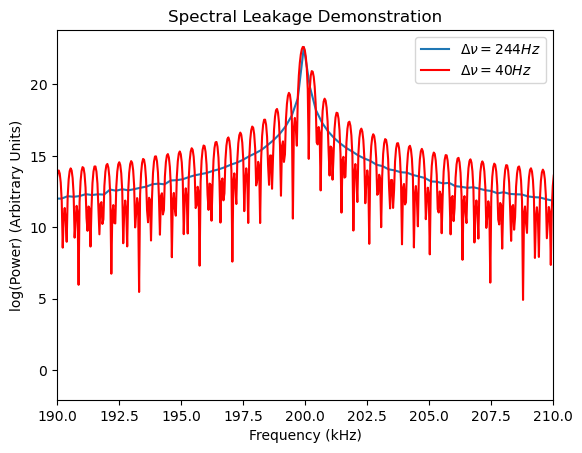

In [151]:
plt.plot(freq2/1e3,np.log(power2),label = r"$\Delta\nu = 244Hz$")
plt.plot(freq1/1e3,np.log(power1), label = r"$\Delta\nu = 40Hz$", color = 'red')
plt.ylabel('log(Power) (Arbitrary Units)')
plt.xlabel('Frequency (kHz)')
plt.xlim(190,210)
plt.legend()
plt.title('Spectral Leakage Demonstration')